Loaded from permuted data
training set loaded
pre-trained VAE loaded
test set (rotating_half) loaded
Loaded from permuted data
1000
1000
0 torch.Size([1, 3, 32, 32])
0 20218.3515625
50 17325.099609375
100 17294.603515625
150 17205.55078125
200 17249.265625
250 17210.546875
[[           -inf]
 [-14383.69433594]
 [-14384.09960938]
 ...
 [-14052.14160156]
 [-14052.14160156]
 [-14052.14160156]]


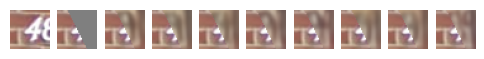

0 torch.Size([1, 3, 32, 32])
0 18842.0390625
50 14658.837890625
100 14637.537109375
150 14564.1826171875
200 14579.5126953125
250 14572.6982421875
[[          -inf]
 [-8728.37792969]
 [-8728.78320312]
 ...
 [-7305.70996094]
 [-7305.71044922]
 [-7305.71044922]]


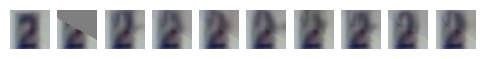

0 torch.Size([1, 3, 32, 32])
0 16745.087890625
50 13845.23828125
100 13820.78125
150 13768.54296875
200 13772.6650390625
250 13792.486328125
[[          -inf]
 [-8007.21337891]
 [-8007.61865234]
 ...
 [-6992.75878906]
 [-6992.75927734]
 [-6992.75927734]]


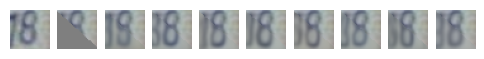

0 torch.Size([1, 3, 32, 32])
0 19559.43359375
50 15194.6220703125
100 15163.494140625
150 15083.2734375
200 15101.966796875
250 15080.3984375
[[           -inf]
 [-12143.51367188]
 [-12000.42480469]
 ...
 [-11111.24707031]
 [-11111.24707031]
 [-11111.24707031]]


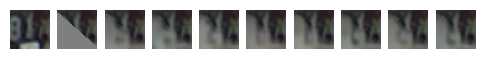

0 torch.Size([1, 3, 32, 32])
0 19903.138671875
50 14647.51953125
100 14590.998046875
150 14564.4375
200 14552.9501953125
250 14573.0859375
[[          -inf]
 [-8306.06347656]
 [-7719.00244141]
 ...
 [-6933.17431641]
 [-6933.17480469]
 [-6933.17480469]]


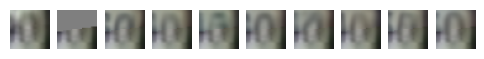

0 torch.Size([1, 3, 32, 32])
0 17889.65625
50 13735.6953125
100 13690.181640625
150 13631.26171875
200 13686.412109375
250 13618.16015625
[[           -inf]
 [-12368.94140625]
 [-12253.671875  ]
 ...
 [-11939.26855469]
 [-11939.26855469]
 [-11939.26855469]]


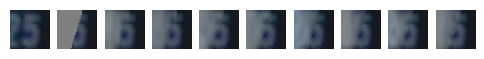

0 torch.Size([1, 3, 32, 32])
0 17587.958984375


KeyboardInterrupt: 

In [1]:
from models.vae import *
from config import svhn_configs
from QAVI import Gaus_QAVI, Mix_QAVI, Flow_QAVI, Feat_QAVI
from data import *

#Load configs from MNIST
configs = svhn_configs()

#Load fully-observed training data
train_loader = dataset_loader(data_type ='svhn')
print("training set loaded")

#Load pre-trained VAE, train with training data if not available
vae = load_baseVAE("svhn", configs, train_loader)
print("pre-trained VAE loaded")

#Load test loader for patches missing data
miss_string = "rotating_half"
print("test set (" + miss_string + ") loaded")

test_data = dataset_loader(batch_size=50, miss_string=miss_string, mode="test",data_type ='svhn')

'''
Using Gaussian posterior
'''
#Create gaus object for inference with a Gaussian posterior
gaus = Gaus_QAVI(configs, test_data)
gaus.show_imputations(test_data, miss_string)
gaus.evaluate(test_data, miss_string)



In [ ]:
'''
Using Flow posterior
'''

flow = Flow_QAVI(configs, test_data)
flow.show_imputations(test_data, miss_string)
flow.evaluate(test_data, miss_string)

In [ ]:
'''
Using Mixture posterior
'''

mix = Mix_QAVI(configs, test_data)
mix.show_imputations(test_data, miss_string)
mix.evaluate(test_data, miss_string)

In [ ]:
'''
Using Feat QAVI
'''

test_data = dataset_loader(batch_size=1, miss_string=miss_string, mode="test",data_type ='svhn')
feat = Feat_QAVI(configs, test_data)
feat.show_imputations(test_data, miss_string)
feat.evaluate(test_data, miss_string)

